## Main Objective
The Main objective of this A/B testing is to examine what happens when the first gate in the game was moved from level 30 to level 40!  
When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

### Data Understanding
The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:

1. **userid**: A unique number that identifies each player.
2. **version**: Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
3. **sum_gamerounds**: the number of game rounds played by the player during the first 14 days after install.
4. **retention_1**: Did the player come back and play 1 day after installing?
5. **retention_7**: Did the player come back and play 7 days after installing?  

When a player installed the game, he or she was randomly assigned to either.  
The dataset can be accessed at: [https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats/data]  

### Hypotheses:
**Null Hypothesis $H_0$:** Moving the first gate from level 30 to level 40 does not have any significant impact on player behavior.  
In other words, there is no statistical difference in key metrics (sum_gamerounds, retention_1, and retention_7) between players assigned to gate_30 (control) and gate_40 (treatment).

**Alternative Hypothesis $H_1$:** Shifting the first gate from level 30 to level 40 does lead to a statistically significant impact on player behavior.  
This means that at least one of the metrics (e.g., the number of game rounds played or retention rates) differs between the two groups.

### Key Metrics
#### Retention
1. **retention_1**: binary indicator (0/1) of whether the user returned on day 1.
2. **retention_7**: binary indicator (0/1) of whether the user returned on day 7.
#### Engagement
1. **sum_gamerounds**: total rounds played in the first 14 days

**Main Objective**: The primary objective is to evaluate the impact of changing the first gate’s position on early player metrics, including engagement and retention.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("datasets/cookie_cats.csv")

In [4]:
dataset.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
dataset.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### Exploratory Data Analysis for Retention Key Metric
#### Is the distribution of players across the two groups (gate_30 and gate_40) balanced?

In [6]:
group_counts = dataset.groupby('version')['userid'].count()

In [7]:
group_counts.head()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

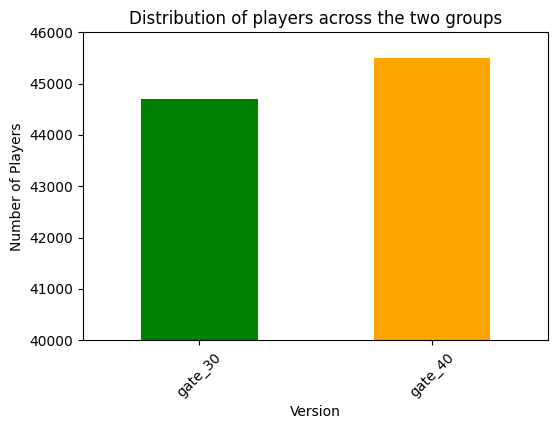

In [8]:
plt.figure(figsize=(6,4))
group_counts.plot(kind='bar', color=['green', 'orange'])
plt.xlabel('Version')
plt.ylabel('Number of Players')
plt.title('Distribution of players across the two groups')
plt.xticks(rotation=45)
plt.ylim(40000, 46000)
plt.show()

> Distribution between gate_30 (44,700 players) and gate_40 (45,489 players) is fairly even, we can reasonably assume that randomization was properly executed during the A/B test!  
1. **No major bias in player assignment**: The test groups are comparable in size, meaning any differences in the results are more likely due to the change in gate position rather than an imbalance in sample sizes.
2. **Statistical robustness**: With both groups having large numbers, we can expect our hypothesis tests to have sufficient power to detect meaningful effects.

#### How do the average retention_1 and retention_7 rates compare between the two groups?

In [16]:
retention_rates = dataset.groupby('version')[['retention_1', 'retention_7']].mean()

In [17]:
retention_rates

,retention_1,retention_7
version,,
gate_30,0.448188,0.190201
gate_40,0.442283,0.182000


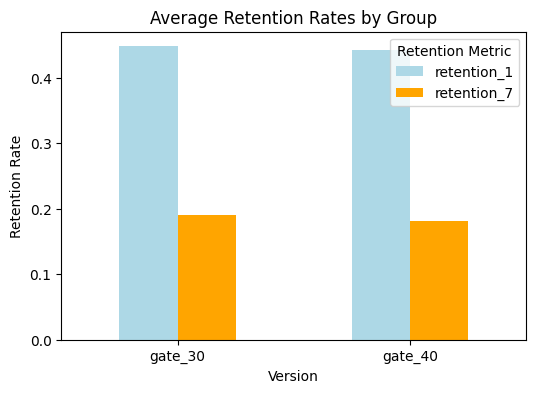

In [18]:
retention_rates.plot(kind='bar', figsize=(6, 4), color=['lightblue', 'orange'])
plt.xlabel('Version')
plt.ylabel('Retention Rate')
plt.title('Average Retention Rates by Group')
plt.xticks(rotation=0)
plt.legend(title="Retention Metric")
plt.show()

> The retention rates are very similar between the two groups, indicating that moving the gate from level 30 to level 40 did not significantly impact player retention.

##### Contingency Tables

In [21]:
# For retention_1
pd.crosstab(dataset['version'], dataset['retention_1'])

retention_1,False,True
version,,
gate_30,24666,20034
gate_40,25370,20119


In [22]:
# For retention_7
pd.crosstab(dataset['version'], dataset['retention_7'])

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


### Two-Proportion Z-Test
1. We are comparing two proportions (binary outcomes).
2. Each group is indepdent and large (CLT applies).
3. It directly tests whether the difference in proportions is statistically significant.

**In other words:**  
1. **Two independent groups**: Players who start at gate_30 vs. players who start at gate_40.
2. **Binary outcome variables**: Retention_1 (whether they returned after 1 day) and Retention_7 (whether they returned after 7 days).
3. **Large sample sizes**: With over 44,000 players per group, normal approximation for a Z-test is valid.

#### The EDA confirms:
1. The groups are balanced.
2. Retention data is binary and suitable for proportion comparison.
3. Sample sizes are large enough to safely use z-tests for proportions.

### Hypotheses:
We are testing whether there is a significant difference in day-1 retention rates between the two groups (gate_30 and gate_40).   
$p_1 = $ proportion of users retained in gate_30   
$p_2 = $ proportion of users retained in gate_40  

- **Null Hypothesis $H_0$**: $p_1 = p_2$ There is **no difference** in day-1 retention between the two groups.
- **Alternative Hypothesis $H_1$**: $p_1 \neq p_2$ There **is** a difference in day-1 retention between the groups.
> This is a two-tailed test since we care about any significant difference — not just one group being higher.

### Calculating the sample proportion and pooled proportions.
For **gate_30**:  
- $n_1 = 44700$
- $x_1 = 24666$ (Number of users retained on day_1)
- $\hat{p_1} = \frac{x_1}{n_1} = \frac{24666}{44700} \approx 0,5518$